In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 🎯 Problem Statement

Pada dataset *Insurance*, tujuan dari pemodelan ini adalah untuk **memprediksi total biaya tagihan asuransi (charges)** yang harus dibayar oleh seseorang berdasarkan beberapa karakteristik individu.

### Variabel Target
- **charges** → Total biaya asuransi (yang ingin diprediksi)

### Variabel Fitur (Independen)
- **age** → Usia pemegang asuransi  
- **sex** → Jenis kelamin  
- **bmi** → Body Mass Index (indeks massa tubuh)  
- **children** → Jumlah anak yang ditanggung  
- **smoker** → Status perokok (ya/tidak)  
- **region** → Wilayah tempat tinggal  

### Jenis Permasalahan
Masalah ini termasuk ke dalam **Supervised Learning** dengan tipe **Regression**, karena target yang diprediksi berupa nilai numerik kontinu.


In [6]:
df = pd.read_csv("dataset/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(1)

In [17]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


## 📊 Ringkasan Hasil Exploratory Data Analysis (EDA) (Hingga Describe)

### 1. Kondisi Data
- Dataset tidak memiliki **missing value**.
- Ditemukan **1 data duplikat**, dan sudah dihapus.
- Setelah pembersihan, total data berjumlah **1337 baris**.

---

### 2. Statistik Dasar Variabel Numerik

#### 👤 Usia (age)
- Rata-rata usia: **39 tahun**
- Standar deviasi: **14**
- Usia termuda: **18 tahun**
- Usia tertua: **64 tahun**
- 25% responden berusia di bawah **27 tahun**
- 50% (median) berusia di bawah **39 tahun**
- 75% berusia di bawah **51 tahun**

➡ Artinya, mayoritas peserta berada pada rentang usia dewasa muda hingga paruh baya.

---

#### ⚖️ Body Mass Index (BMI)
- Rata-rata BMI: **30**
- Standar deviasi: **6.1**
- BMI terendah: **15.9**
- BMI tertinggi: **53.1**
- 25% data di bawah **26.2**
- 50% (median): **30.4**
- 75% di bawah **34.7**

➡ Nilai rata-rata BMI berada pada kategori **overweight**, menunjukkan bahwa sebagian besar peserta memiliki berat badan di atas normal.

---

#### 👶 Jumlah Anak (children)
- Minimum: **0 anak**
- Maksimum: **5 anak**

➡ Mayoritas peserta memiliki jumlah anak yang relatif sedikit.

---

#### 💰 Biaya Asuransi (charges)
- Rata-rata biaya: **13.279**
- Standar deviasi: **12.110**
- Biaya terendah: **1.121**
- Biaya tertinggi: **63.770**
- 25% biaya di bawah **4.746**
- 50% (median): **9.386**
- 75% di bawah **16.657**

➡ Rentang biaya sangat lebar, menandakan adanya perbedaan besar antar individu, kemungkinan dipengaruhi oleh faktor seperti **status perokok, BMI, dan usia**.

---

### 3. Insight Awal
- Tidak ada masalah data kosong.
- Biaya asuransi memiliki variasi yang sangat besar.
- Usia dan BMI berada pada rentang yang cukup luas, sehingga berpotensi menjadi fitur penting dalam model.


Text(0.5, 1.0, 'Distribution Charges')

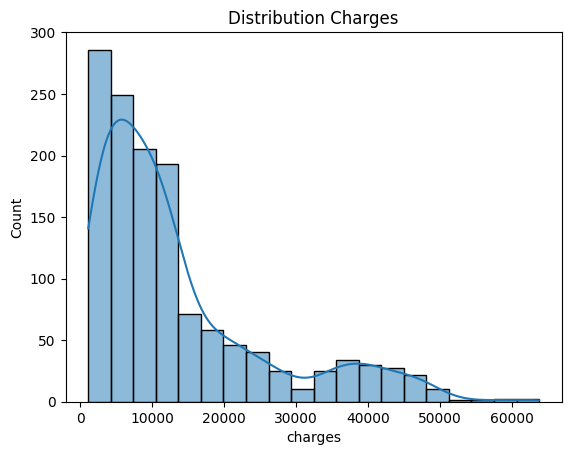

In [20]:
sns.histplot(data=df, bins=20, x='charges', kde=True)
plt.title("Distribution Charges")